# ex1: Download file dữ liệu. Dùng Pandas đọc file.

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt_ex3, pyplot as plt_ex6, pyplot as plt_ex7

# read file weight-height.csv
df = pd.read_csv("../weight-height.csv")
print("exercise 1:")
print(df)
# data include gender, height, weight
# get height and weight
x = df['Height'].values*0.0254
y = df['Weight'].values*0.453592

exercise 1:
    Gender     Height      Weight
0     Male  68.866302  190.385361
1     Male  68.729228  188.339285
2     Male  66.797740  172.530025
3     Male  62.332563  140.463267
4     Male  73.208026  221.779279
..     ...        ...         ...
94  Female  66.291505  140.319413
95  Female  62.179200  135.957105
96  Female  60.444547  115.440498
97  Female  61.915184  123.958661
98  Female  66.624544  149.828094

[99 rows x 3 columns]


# ex2: Dùng sklearn để xây dựng hàm tuyến tính, cũng như print ra giá trị của các biến số.

In [2]:
# exercise 2: calculate intercept, slope and R-squared by Scikit-learn library

# reshape the arrays to 2D arrays
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# create a linear regression model
model = LinearRegression()

# fit the model to the data
model.fit(x, y)
print("exercise 2: calculate intercept, slope and R-squared by Scikit-learn library")
print("w0 = ", model.intercept_)
print("w1 = ", model.coef_)
print("R-squared = ", model.score(x, y))

exercise 2: calculate intercept, slope and R-squared by Scikit-learn library
w0 =  [-149.31275626]
w1 =  [[131.71982766]]
R-squared =  0.8692137082710343


# ex3: Vẽ các điểm và đường thẳng tuyến tính đã giải bằng sklearn.

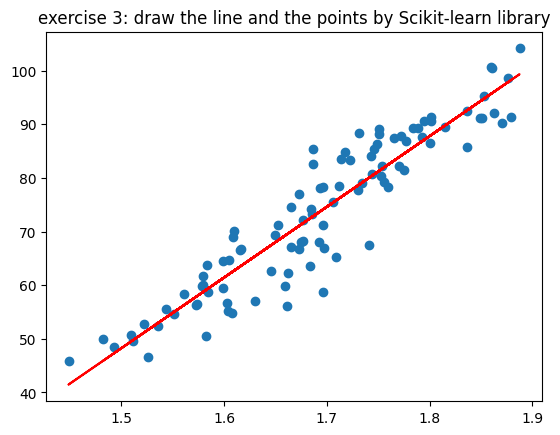

In [3]:
# exercise 3: draw the line and the points by Scikit-learn library
y_pred = model.intercept_ + model.coef_*x
plt_ex3.scatter(x, y)
plt_ex3.plot(x, y_pred, color='red')
plt_ex3.title("exercise 3: draw the line and the points by Scikit-learn library")
plt_ex3.show()

# ex4: Viết hàm đạo hàm.

In [4]:
# exercise 4: write def loss(w0, w1, x, y) and def derivative(w0, w1, x, y)
def loss(x, y, w0, w1):
    return 1/len(x) * np.sum((y - w0 - w1*x)**2)
def derivative(x, y, w0, w1):
    d0 = 2/len(x) * np.sum(w0 + w1*x - y)
    d1 = 2/len(x) * np.sum((w0 + w1*x - y) * x)
    return d0, d1

# ex5: Xây dựng hàm gradient descent để tìm lời giải cho hàm tuyến tính, và print ra giá trị.

In [5]:
# exercise 5: write def gradient_descent, and print the result
def gradient_descent( w0, w1, alpha, iteration, tolerance):
    i = 0
    w0s = [w0]
    w1s = [w1]
    losses = []
    losses.append(loss(x, y, w0, w1))
    while i < iteration:
        d0, d1 = derivative(x, y, w0, w1)
        w0 = w0 - alpha * d0
        w1 = w1 - alpha * d1
        w0s.append(w0)
        w1s.append(w1)
        losses.append(loss(x, y, w0, w1))
        if abs(losses[-1] - losses[-2]) < tolerance:
            break
        i += 1
    return w0s, w1s, i

# ex6: Vẽ các điểm và đường thẳng tuyến tính đã giải bằng gradient descent.

exercise 6: print the result
w0 =  -129.96733902092487
w1 =  120.31876305967323
iteration =  200


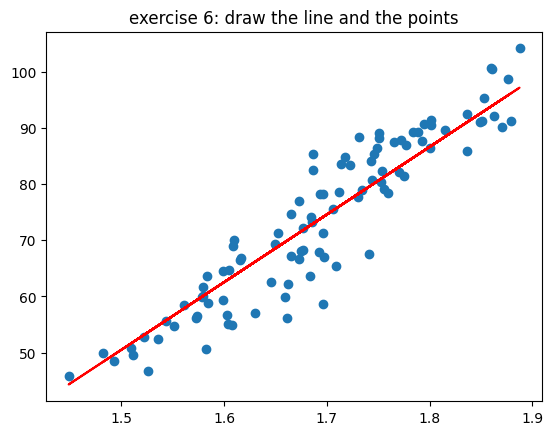

In [10]:
# print the result
w0s, w1s, i = gradient_descent(-200, 1, 0.01, 200, 0.0001)
print("exercise 6: print the result")
print("w0 = ", w0s[-1])
print("w1 = ", w1s[-1])
print("iteration = ", i)
plt_ex6.plot(x, w0s[-1] + w1s[-1]*x, color='red')
plt_ex6.scatter(x, y)
plt_ex6.title("exercise 6: draw the line and the points")
plt_ex6.show()

# ex7: Vẽ các điểm cũng như các đường thẳng mà trong quá trình tính toán của hàm gradient descent

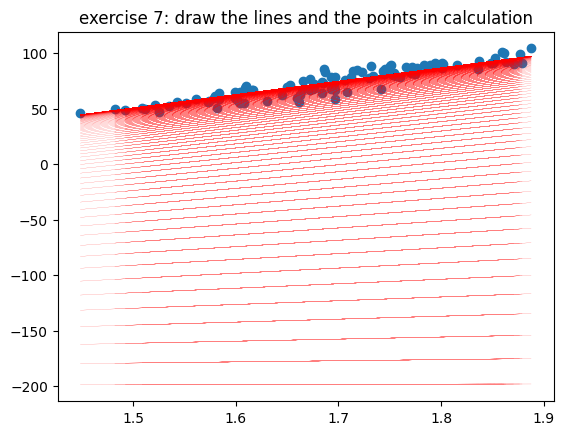

In [11]:
# exercise 7: draw the lines and the points in calculation
for i in range(len(w0s) - 1):
    plt_ex7.plot(x, w0s[i] + w1s[i]*x, color='red',linewidth=0.1, alpha=0.5)
plt_ex7.scatter(x, y)
plt_ex7.title("exercise 7: draw the lines and the points in calculation")
plt_ex7.show()